In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('./content/drive/MyDrive/fruits'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
import matplotlib.pyplot as plt # For plotting graphs (accuracy/loss, image samples, etc.).
import seaborn as sns #used for prettier visualizations like heatmaps (e.g., confusion matrix).
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization

In [4]:
from sklearn.model_selection import train_test_split # Splits data into training and testing sets.
from sklearn.metrics import classification_report,confusion_matrix #Prints precision, recall, F1-score.

In [5]:
from keras.callbacks import ReduceLROnPlateau

from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [6]:
import cv2

In [7]:
labels = ['APPLE', 'BANANA','CHERRY','MANGO','ORANGE'] # two classes of  dataset
img_size = 160  # All images will be resized to 160×160 pixels
def get_training_data(data_dir): # reads images from folders, preprocesses them, and returns them as NumPy arrays along with their labels.
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

print(labels)

['APPLE', 'BANANA', 'CHERRY', 'MANGO', 'ORANGE']


In [8]:
def get_training_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        count = 0
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
                count += 1
            except Exception as e:
                print(e)
        print(f"{label}: {count} images loaded.")
    return np.array(data)

print("Labels:", labels)
print("Number of Classes:", len(labels))
print("Image Size (pixels):", img_size, "x", img_size)


Labels: ['APPLE', 'BANANA', 'CHERRY', 'MANGO', 'ORANGE']
Number of Classes: 5
Image Size (pixels): 160 x 160


In [9]:
import os

base_dir = '/content/drive/MyDrive/fruits'

train_dir = os.path.join(base_dir, '/content/drive/MyDrive/fruits')
validation_dir = os.path.join(base_dir, '/content/drive/MyDrive/fruits')
test_dir = os.path.join(base_dir, '/content/drive/MyDrive/fruits')

train_APPLE_dir = os.path.join(train_dir, '/content/drive/MyDrive/fruits/APPLE')
train_BANANA_dir = os.path.join(train_dir, '/content/drive/MyDrive/fruits/BANANA')
train_CHERRY_dir = os.path.join(train_dir, '/content/drive/MyDrive/fruits/CHERRY')
train_MANGO_dir = os.path.join(train_dir, '/content/drive/MyDrive/fruits/MANGO')
train_ORANGE_dir = os.path.join(train_dir, '/content/drive/MyDrive/fruits/ORANGE')

validation_APPLE_dir = os.path.join(validation_dir, '/content/drive/MyDrive/fruits/APPLE')
validation_BANANA_dir = os.path.join(validation_dir, '/content/drive/MyDrive/fruits/BANANA')
validation_CHERRY_dir = os.path.join(validation_dir, '/content/drive/MyDrive/fruits/CHERRY')
validation_MANGO_dir = os.path.join(validation_dir, '/content/drive/MyDrive/fruits/MANGO')
validation_ORANGE_dir = os.path.join(validation_dir, '/content/drive/MyDrive/fruits/ORANGE')


test_APPLE_dir = os.path.join(test_dir, '/content/drive/MyDrive/fruits/APPLE')
test_BANANA_dir = os.path.join(test_dir, '/content/drive/MyDrive/fruits/BANANA')
test_CHERRY_dir = os.path.join(test_dir, '/content/drive/MyDrive/fruits/CHERRY')
test_MANGO_dir = os.path.join(test_dir, '/content/drive/MyDrive/fruits/MANGO')
test_ORANGE_dir = os.path.join(test_dir, '/content/drive/MyDrive/fruits/ORANGE')


train_APPLE_fnames = os.listdir(train_APPLE_dir)
train_BANANA_fnames = os.listdir(train_BANANA_dir)
train_CHERRY_fnames = os.listdir(train_CHERRY_dir)
train_MANGO_fnames = os.listdir(train_MANGO_dir)
train_ORANGE_fnames = os.listdir(train_ORANGE_dir)

validation_APPLE_fnames = os.listdir(validation_APPLE_dir)
validation_BANANA_fnames = os.listdir(validation_BANANA_dir)
validation_CHERRY_fnames = os.listdir(validation_CHERRY_dir)
validation_MANGO_fnames = os.listdir(validation_MANGO_dir)
validation_ORANGE_fnames = os.listdir(validation_ORANGE_dir)

test_APPLE_fnames = os.listdir(test_APPLE_dir)
test_BANANA_fnames = os.listdir(test_BANANA_dir)
test_CHERRY_fnames = os.listdir(test_CHERRY_dir)
test_MANGO_fnames = os.listdir(test_MANGO_dir)
test_ORANGE_fnames = os.listdir(test_ORANGE_dir)

n_train = len(train_APPLE_fnames) + len(train_BANANA_fnames)+len(train_CHERRY_fnames)+len(train_MANGO_fnames)+len(train_ORANGE_fnames)
n_validation = len(validation_APPLE_fnames) + len(validation_BANANA_fnames)+len(validation_CHERRY_fnames)+len(validation_MANGO_fnames)+len(validation_ORANGE_fnames)
n_test = len(test_APPLE_fnames) + len(test_BANANA_fnames)+len(test_CHERRY_fnames)+len(test_MANGO_fnames)+len(test_ORANGE_fnames)

print(n_train, n_validation, n_test)

200 200 200


In [10]:
import matplotlib.pyplot as plt
import os

fig, ax = plt.subplots(5, 5, figsize=(20, 20))  # 5 rows for each fruit

# Display 5 APPLE images
for i in range(5):
    img = plt.imread(os.path.join(train_APPLE_dir, train_APPLE_fnames[i]))
    ax[0, i].imshow(img, cmap='gray')
    ax[0, i].axis('off')
    ax[0, i].set_title('APPLE', fontsize=15)

# Display 5 BANANA images
for i in range(5):
    img = plt.imread(os.path.join(train_BANANA_dir, train_BANANA_fnames[i]))
    ax[1, i].imshow(img, cmap='gray')
    ax[1, i].axis('off')
    ax[1, i].set_title('BANANA', fontsize=15)

# Display 5 CHERRY images
for i in range(5):
    img = plt.imread(os.path.join(train_CHERRY_dir, train_CHERRY_fnames[i]))
    ax[2, i].imshow(img, cmap='gray')
    ax[2, i].axis('off')
    ax[2, i].set_title('CHERRY', fontsize=15)

# Display 5 MANGO images
for i in range(5):
    img = plt.imread(os.path.join(train_MANGO_dir, train_MANGO_fnames[i]))
    ax[3, i].imshow(img, cmap='gray')
    ax[3, i].axis('off')
    ax[3, i].set_title('MANGO', fontsize=15)

# Display 5 ORANGE images
for i in range(5):
    img = plt.imread(os.path.join(train_ORANGE_dir, train_ORANGE_fnames[i]))
    ax[4, i].imshow(img, cmap='gray')
    ax[4, i].axis('off')
    ax[4, i].set_title('ORANGE', fontsize=15)

plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    samplewise_center=True,
    samplewise_std_normalization=True,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1
)

validation_datagen = ImageDataGenerator(
    rescale=1.0/255,
    samplewise_center=True,
    samplewise_std_normalization=True,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1.0/255,
    samplewise_center=True,
    samplewise_std_normalization=True
)

# Use class_mode='categorical' for multi-class classification
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=16,
    class_mode='categorical',
    target_size=(160, 160)
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    batch_size=16,
    class_mode='categorical',
    target_size=(160, 160)
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    class_mode='categorical',
    target_size=(160, 160)
)


Found 199 images belonging to 5 classes.
Found 199 images belonging to 5 classes.
Found 199 images belonging to 5 classes.


In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score
from tensorflow.keras.callbacks import Callback
import numpy as np

class MetricsCallback(Callback):
    def __init__(self, validation_generator):
        super().__init__()
        self.validation_generator = validation_generator
        self.precision = []
        self.recall = []
        self.f1s = []

    def on_epoch_end(self, epoch, logs=None):
        val_predict = np.argmax(self.model.predict(self.validation_generator, verbose=0), axis=1)
        val_true = self.validation_generator.classes[:len(val_predict)]

        self.precision.append(precision_score(val_true, val_predict, average='macro'))
        self.recall.append(recall_score(val_true, val_predict, average='macro'))
        self.f1s.append(f1_score(val_true, val_predict, average='macro'))


In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Define CNN Model
model = models.Sequential(name='fruits_model')

model.add(layers.InputLayer(input_shape=(160,160,3)))

model.add(layers.Conv2D(32, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))  # Binary classification

# Learning Rate Scheduler
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9
)

# Compile model
model.compile(
    optimizer=Adam(learning_rate=1e-4),  # ✅ learning_rate must be float here
    loss='categorical_crossentropy',
    metrics=['accuracy',
             tf.keras.metrics.Precision(name='precision'),
             tf.keras.metrics.Recall(name='recall')]
)
# Callbacks for better training control
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]



history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    epochs=5,
    callbacks=callbacks,
    verbose=1
)

model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 107s 8s/step - accuracy: 0.2686 - loss: 3.9176 - precision: 0.2297 - recall: 0.1884 - val_accuracy: 0.3116 - val_loss: 1.4971 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 50s 4s/step - accuracy: 0.3705 - loss: 3.2559 - precision: 0.3772 - recall: 0.3582 - val_accuracy: 0.3568 - val_loss: 1.4276 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 49s 4s/step - accuracy: 0.5366 - loss: 1.8991 - precision: 0.5726 - recall: 0.5192 - val_accuracy: 0.4271 - val_loss: 1.4065 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 49s 4s/step - accuracy: 0.6171 - loss: 1.5807 - precision: 0.6087 - recall: 0.5537 - val_accuracy: 0.4925 - val_loss: 1.4732 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 5/5
13/13 ━━━━━━━━━━━

Model: "fruits_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 160, 160, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 160, 160, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 160, 160, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 80, 80, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 80, 80, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 80, 80, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 80, 80, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 40, 40, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 40, 40, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 40, 40, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 40, 40, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 20, 20, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 20, 20, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 20, 20, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    13,107,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,499,921 (154.49 MB)

 Trainable params: 13,499,653 (51.50 MB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 26,999,308 (102.99 MB)

In [15]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    batch_size=16,
    class_mode='categorical',
    target_size=(160, 160)
)


Found 199 images belonging to 5 classes.


In [16]:
# Create the callback
metrics_callback = MetricsCallback(validation_generator)

# Train your model
history = model.fit(
    train_generator,
    epochs=10,  # or any number of epochs
    validation_data=validation_generator,
    callbacks=[metrics_callback]
)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 74s 6s/step - accuracy: 0.5901 - loss: 1.3343 - precision: 0.6535 - recall: 0.5516 - val_accuracy: 0.5628 - val_loss: 1.4442 - val_precision: 0.6667 - val_recall: 0.0101
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


13/13 ━━━━━━━━━━━━━━━━━━━━ 72s 5s/step - accuracy: 0.6764 - loss: 0.8937 - precision: 0.7219 - recall: 0.6208 - val_accuracy: 0.4925 - val_loss: 1.3934 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


13/13 ━━━━━━━━━━━━━━━━━━━━ 81s 5s/step - accuracy: 0.6782 - loss: 0.6745 - precision: 0.7376 - recall: 0.6283 - val_accuracy: 0.4271 - val_loss: 1.4074 - val_precision: 0.5714 - val_recall: 0.0201
Epoch 4/10


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


13/13 ━━━━━━━━━━━━━━━━━━━━ 71s 6s/step - accuracy: 0.7132 - loss: 0.6967 - precision: 0.7622 - recall: 0.6844 - val_accuracy: 0.4121 - val_loss: 1.4137 - val_precision: 0.6786 - val_recall: 0.0955
Epoch 5/10


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


13/13 ━━━━━━━━━━━━━━━━━━━━ 65s 5s/step - accuracy: 0.6867 - loss: 0.7548 - precision: 0.7254 - recall: 0.6337 - val_accuracy: 0.3065 - val_loss: 1.5135 - val_precision: 0.7391 - val_recall: 0.1709
Epoch 6/10


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


13/13 ━━━━━━━━━━━━━━━━━━━━ 71s 6s/step - accuracy: 0.7777 - loss: 0.6189 - precision: 0.8173 - recall: 0.7063 - val_accuracy: 0.5377 - val_loss: 1.2990 - val_precision: 0.5811 - val_recall: 0.2161
Epoch 7/10


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


13/13 ━━━━━━━━━━━━━━━━━━━━ 65s 5s/step - accuracy: 0.7753 - loss: 0.5792 - precision: 0.8033 - recall: 0.7026 - val_accuracy: 0.4171 - val_loss: 1.2410 - val_precision: 0.5534 - val_recall: 0.2864
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 69s 6s/step - accuracy: 0.8063 - loss: 0.5339 - precision: 0.8456 - recall: 0.7798 - val_accuracy: 0.4774 - val_loss: 1.1554 - val_precision: 0.5714 - val_recall: 0.3819
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 64s 5s/step - accuracy: 0.8069 - loss: 0.5122 - precision: 0.8231 - recall: 0.7692 - val_accuracy: 0.4372 - val_loss: 1.1207 - val_precision: 0.5414 - val_recall: 0.3618
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 64s 5s/step - accuracy: 0.7936 - loss: 0.4888 - precision: 0.8035 - recall: 0.7631 - val_accuracy: 0.6332 - val_loss: 0.9127 - val_precision: 0.7807 - val_recall: 0.4472


13/13 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step
Confusion Matrix:
 [[14  2  0 18  6]
 [11  7  1 16  5]
 [13  9  3 12  3]
 [18  6  1 10  4]
 [15  3  1 16  5]]

Classification Report:
               precision    recall  f1-score   support

       APPLE       0.20      0.35      0.25        40
      BANANA       0.26      0.17      0.21        40
      CHERRY       0.50      0.07      0.13        40
       MANGO       0.14      0.26      0.18        39
      ORANGE       0.22      0.12      0.16        40

    accuracy                           0.20       199
   macro avg       0.26      0.20      0.19       199
weighted avg       0.26      0.20      0.19       199



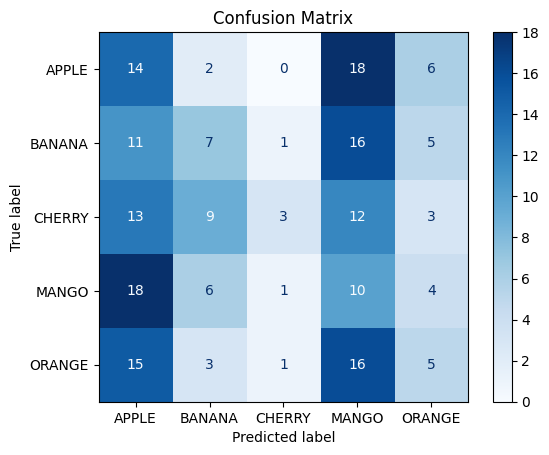

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Predict class probabilities
y_pred_prob = model.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size + 1, verbose=1)

# Convert to class indices
y_pred = np.argmax(y_pred_prob, axis=1)

# Get true labels
y_true = validation_generator.classes

# Trim y_pred to match y_true if needed
y_pred = y_pred[:len(y_true)]

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=list(validation_generator.class_indices.keys())))

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(validation_generator.class_indices.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Get file paths and label mappings
filenames = validation_generator.filepaths
class_indices = validation_generator.class_indices
idx_to_label = {v: k for k, v in class_indices.items()}

# Ensure correct length of predictions
y_pred = y_pred[:len(filenames)]
y_true = y_true[:len(filenames)]

# Create directories per class for plotting
classes = list(class_indices.keys())

def plot_grouped_images(group, correct=True, max_per_class=5):
    plt.figure(figsize=(15, len(classes) * 3))
    plot_idx = 1

    for class_idx, class_name in enumerate(classes):
        # Get indices where ground truth == class_idx
        indices = np.where(y_true == class_indices[class_name])[0]

        # Filter by correct or incorrect
        if correct:
            selected = [i for i in indices if y_pred[i] == y_true[i]]
        else:
            selected = [i for i in indices if y_pred[i] != y_true[i]]

        # Plot up to max_per_class images
        for i in selected[:max_per_class]:
            img = plt.imread(filenames[i])
            plt.subplot(len(classes), max_per_class, plot_idx)
            plt.imshow(img)
            plt.axis('off')
            pred_label = idx_to_label[y_pred[i]]
            true_label = idx_to_label[y_true[i]]
            color = 'green' if correct else 'red'
            plt.title(f'T:{true_label}\nP:{pred_label}', fontsize=9, color=color)
            plot_idx += 1

    title = "Correctly Predicted Samples" if correct else "Incorrectly Predicted Samples"
    plt.suptitle(title, fontsize=18)
    plt.tight_layout()
    plt.show()

# 🔍 Plot correct predictions grouped by class
plot_grouped_images(group='correct', correct=True, max_per_class=5)

# 🔍 Plot incorrect predictions grouped by class
plot_grouped_images(group='incorrect', correct=False, max_per_class=5)


Output hidden; open in https://colab.research.google.com to view.

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Ensure predicted and true labels are the same length
y_pred = y_pred[:len(y_true)]

# Print classification report with per-class precision, recall, f1-score
print("\nDetailed Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=list(class_indices.keys())))

# Compute overall metrics (macro and weighted average)
accuracy = accuracy_score(y_true, y_pred)
precision_macro = precision_score(y_true, y_pred, average='macro')
recall_macro = recall_score(y_true, y_pred, average='macro')
f1_macro = f1_score(y_true, y_pred, average='macro')

precision_weighted = precision_score(y_true, y_pred, average='weighted')
recall_weighted = recall_score(y_true, y_pred, average='weighted')
f1_weighted = f1_score(y_true, y_pred, average='weighted')

print("\nOverall Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision (Macro): {precision_macro:.4f}")
print(f"Recall (Macro):    {recall_macro:.4f}")
print(f"F1 Score (Macro):  {f1_macro:.4f}")
print(f"Precision (Weighted): {precision_weighted:.4f}")
print(f"Recall (Weighted):    {recall_weighted:.4f}")
print(f"F1 Score (Weighted):  {f1_weighted:.4f}")



Detailed Classification Report:

              precision    recall  f1-score   support

       APPLE       0.20      0.35      0.25        40
      BANANA       0.26      0.17      0.21        40
      CHERRY       0.50      0.07      0.13        40
       MANGO       0.14      0.26      0.18        39
      ORANGE       0.22      0.12      0.16        40

    accuracy                           0.20       199
   macro avg       0.26      0.20      0.19       199
weighted avg       0.26      0.20      0.19       199


Overall Metrics:
Accuracy:  0.1960
Precision (Macro): 0.2625
Recall (Macro):    0.1963
F1 Score (Macro):  0.1861
Precision (Weighted): 0.2632
Recall (Weighted):    0.1960
F1 Score (Weighted):  0.1861


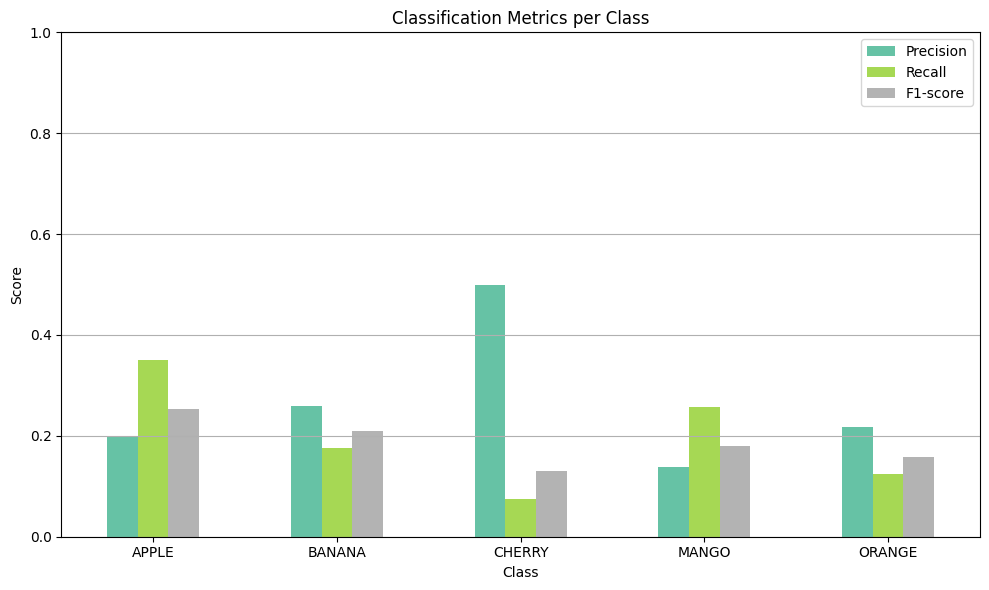

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd

# Get class labels
labels = list(class_indices.keys())

# Get classification report as dictionary
report = classification_report(y_true, y_pred, target_names=labels, output_dict=True)

# Extract per-class metrics
precision = [report[label]['precision'] for label in labels]
recall = [report[label]['recall'] for label in labels]
f1_score_ = [report[label]['f1-score'] for label in labels]

# Create a DataFrame for easier plotting
metrics_df = pd.DataFrame({
    'Class': labels,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1_score_
})

# Plotting
metrics_df.set_index('Class').plot(kind='bar', figsize=(10, 6), ylim=(0, 1), colormap='Set2')
plt.title('Classification Metrics per Class')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


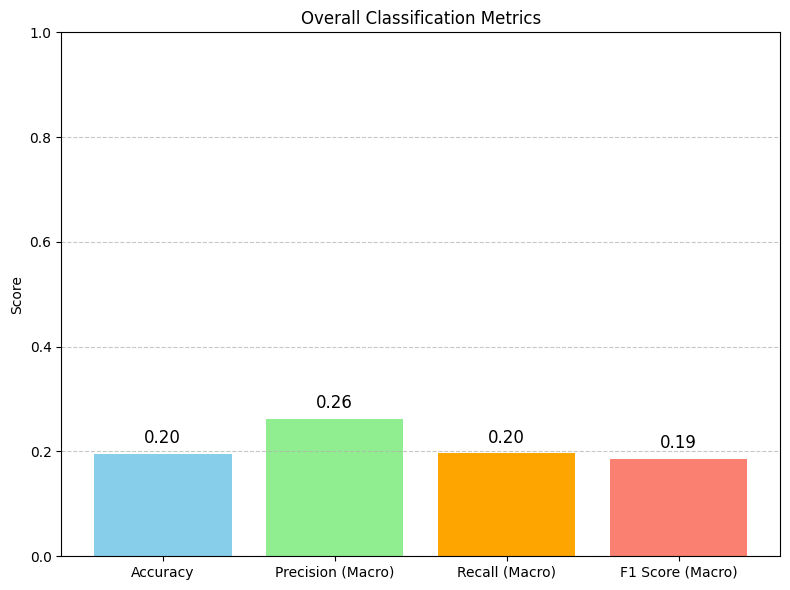

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Compute metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Put into dict for easy plotting
metrics = {
    'Accuracy': accuracy,
    'Precision (Macro)': precision,
    'Recall (Macro)': recall,
    'F1 Score (Macro)': f1
}

# Plot
plt.figure(figsize=(8, 6))
plt.bar(metrics.keys(), metrics.values(), color=['skyblue', 'lightgreen', 'orange', 'salmon'])
plt.ylim(0, 1)
plt.title('Overall Classification Metrics')
plt.ylabel('Score')
for i, v in enumerate(metrics.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


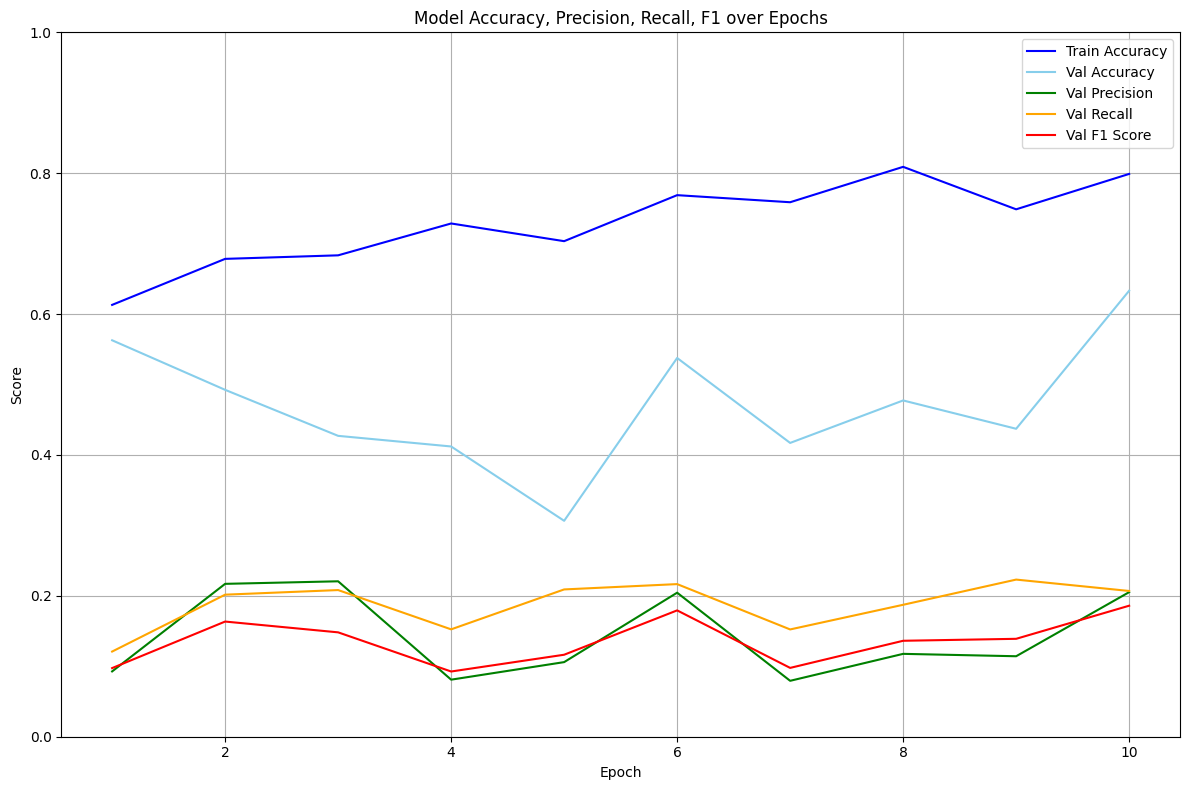

In [22]:
import matplotlib.pyplot as plt

# Get the number of epochs
epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(12, 8))

# Accuracy
plt.plot(epochs, history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(epochs, history.history['val_accuracy'], label='Val Accuracy', color='skyblue')

# Precision
plt.plot(epochs, metrics_callback.precision, label='Val Precision', color='green')

# Recall
plt.plot(epochs, metrics_callback.recall, label='Val Recall', color='orange')

# F1 Score
plt.plot(epochs, metrics_callback.f1s, label='Val F1 Score', color='red')

plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Model Accuracy, Precision, Recall, F1 over Epochs')
plt.ylim(0, 1.0)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
